In [3]:
# 시각화
import matplotlib.pyplot as plt

# MNIST 데이터 불러오기
from tensorflow.keras.datasets import mnist

# 이진분류 : 0,1 구분
#   - 결과 : 0.5 기준으로 0.5보다 크면 1, 0.5보다 작으면 0 --> 결과가 1개면 됨
# 다중분류 : 3개 이상으로 분류 : 0,1,2,3,4,5,6,7,8,9
#   - 결과 : 출력이 10개로 되어야 함. -> y값을 웟핫인코딩
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

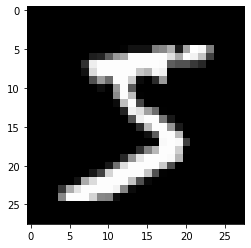

In [7]:
# 데이터(이미지) 확인
plt.imshow(X_train[0], cmap='gray')

In [8]:
# 분류하는 답의 개수(0~9, 10개)
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

# X값 전처리

In [9]:
X_train.shape, X_train[0].shape

((60000, 28, 28), (28, 28))

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_test.shape

(10000, 28, 28, 1)

# y값 전처리

In [14]:
y_train.shape

(60000,)

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical # one-hot encoding

In [17]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [18]:
Y_train.shape

(60000, 10)

In [19]:
Y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# CNN Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [23]:
model = Sequential()

model.add(Conv2D(filters=8, # 필터 수
                kernel_size=(3, 3), # 필터의 크기
                activation="sigmoid",
                padding="same", # 이미지의 입력의 크기와 출력의 크기를 동일하게 
                input_shape=(28,28,1) # 입력 데이터 크기
                )) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=16, # 필터 수
                kernel_size=(3, 3), # 필터의 크기
                activation="sigmoid",
                padding="same", # 이미지의 입력의 크기와 출력의 크기를 동일하게 
                )) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten()) # 1차원으로 데이터를 나열


model.add(Dense(units=128, activation="sigmoid"))

model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [26]:
model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6134 - accuracy: 0.8108 - val_loss: 0.1696 - val_accuracy: 0.9511
Epoch 2/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1399 - accuracy: 0.9580 - val_loss: 0.1003 - val_accuracy: 0.9684
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0739 - val_accuracy: 0.9767
